#### Known error: This notebook requires [yt](https://yt-project.org/) to visualize the results. Yt needs to be updated to work properly first. Updates are currently being made to yt's frontends to make this PyNE integration work.

In [1]:
from yt.mods import *
import h5py

In [3]:
# If necessary files aren't in the current dir, download them
import os
import requests

if not os.path.isfile("mcnp_n_impr_fluka.h5m"):
    r = requests.get("http://data.pyne.io/mcnp_n_impr_fluka.h5m")
    with open("mcnp_n_impr_fluka.h5m", "wb") as outfile:
        outfile.write(r.content)
    
if not os.path.isfile("fng_usrbin22.h5m"):
    # fng_usrbin22.h5m is a large file
    # needs to be downloaded in chunks
    r = requests.get("http://data.pyne.io/fng_usrbin22.h5m", stream=True)
    with open("fng_usrbin22.h5m" , 'wb') as file:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:
                file.write(chunk)
                file.flush()

In [4]:
# Load data file
pf = load("fng_usrbin22.h5m")


yt : [INFO     ] 2015-02-19 07:12:03,396 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-02-19 07:12:03,396 Parameters: domain_dimensions         = [ 99.    91.53  98.4 ]
yt : [INFO     ] 2015-02-19 07:12:03,397 Parameters: domain_left_edge          = [-49.5 -14.1 -49.2]
yt : [INFO     ] 2015-02-19 07:12:03,399 Parameters: domain_right_edge         = [ 49.5   77.43  49.2 ]
yt : [INFO     ] 2015-02-19 07:12:03,400 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2015-02-19 07:12:08,303 Loading field plugins.
yt : [INFO     ] 2015-02-19 07:12:08,304 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-02-19 07:12:08,305 Loaded astro (15 new fields)
yt : [INFO     ] 2015-02-19 07:12:08,306 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-02-19 07:12:08,308 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-02-19 07:12:08,310 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-02-19 07:12:08,311 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-02-19 07:12:08,312 Loaded local (112 new fields)
yt : [INFO     ] 2015-02-19 07:12:08,313 Loaded magnetic_field (120 new fields)
yt : [INFO     ] 2015-02-19 07:12:08,314 Loaded my_plugins (120 new fields)
yt : [INFO     ] 2015-02-19 07:12:08,315 Loaded species (122 new fields)
yt : [INFO     ] 2015-02-19 07:12:10,477 xlim = -49.500000 49.500000
yt : [INFO     ] 2015-02-19 07:12:10,477 ylim = -14.100000 77.430000
yt : [INFO     ] 2015-02-19 07:12:10,479 Making a fi


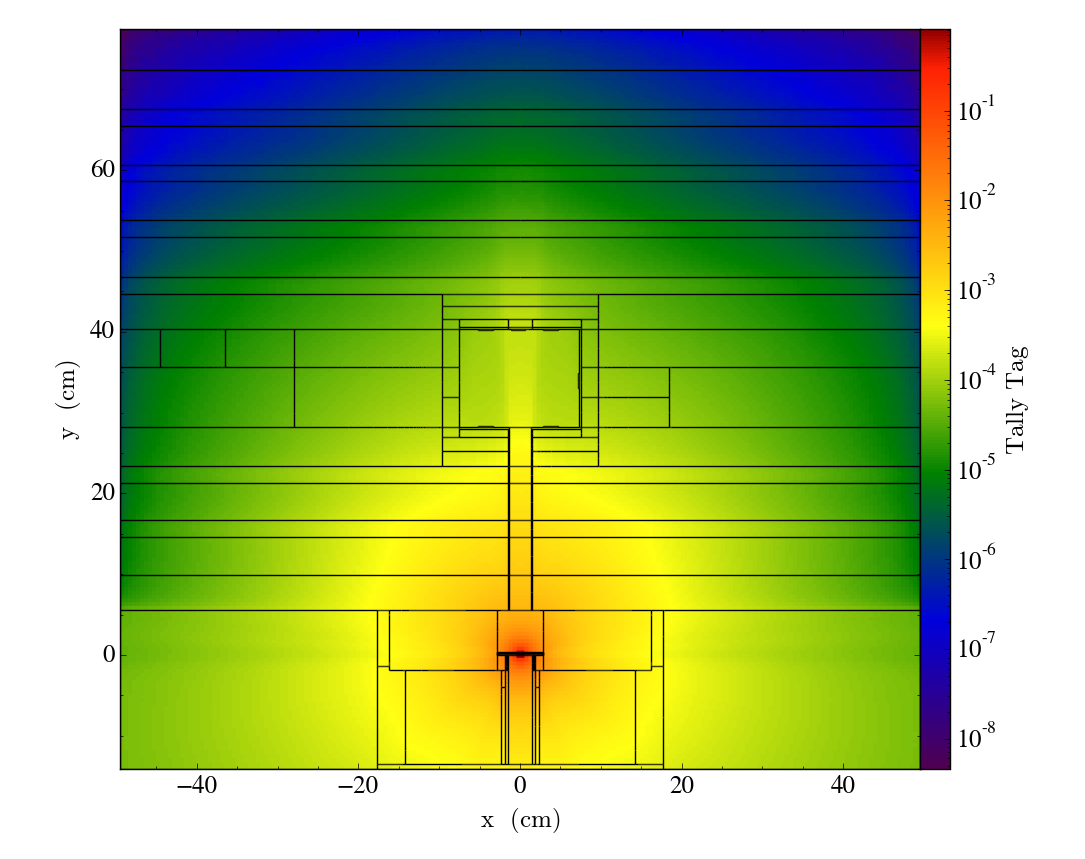

In [5]:
# Create the desired slice plot
s = SlicePlot(pf, 'z', ('moab','TALLY_TAG'), origin='lower-native')
# Load the facet file
f = h5py.File("mcnp_n_impr_fluka.h5m", "r")
# Get the triangle vertices
coords = f["/tstt/nodes/coordinates"][:]
conn = f["/tstt/elements/Tri3/connectivity"][:]
points = coords[conn-1]
# Annotate slice-triangle intersection contours to the plot
s.annotate_triangle_facets(points, plot_args={"colors": 'black'})
s.display()